In [1]:
import pandas as pd
import sqlalchemy as sql
import database as db
import betSim as bs
import mysql.connector as mysql
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
df = db.getTable('LCK_Summer_2022')

In [3]:
# very basic simulation of a beting strategy
units =100.0
for i in range(len(df)):
    if (units < 1):
        print(f'no more units left after {str(i)} games')
        break
    outcome = bs.killsBet(i, df, 'under', 21.5)
    if(outcome == 1):
        units += 0.83
    else:
        units -= 1

print(f'units: {str(units)}')

units: 87.23999999999995


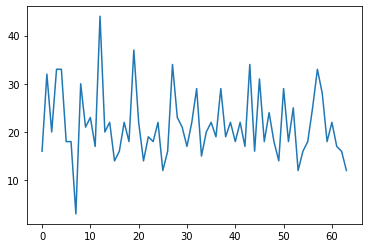

In [5]:
#plot total kills over the tournament
plt.plot(df['Total_kills'])

In [30]:
df_firstGame = pd.read_sql_query('SELECT * From games where tournamentID = 1 and Num_in_Match = 1', db.engine)
df_testing = pd.read_sql_query('SELECT * FROM games WHERE tournamentID = 1', db.engine)

In [7]:
#plt.plot(df_firstGame['Total_kills'])
print(len(df_firstGame))

90


In [15]:
def runSim(df ,choice,num,betType,banList):
    units = 100.0
    wins = 0
    loses = 0
    for i in range(len(df)):
        blueteam = df['Blue_Team_Name'][i]
        redteam = df['Red_Team_Name'][i]
        if (blueteam in banList) or (redteam in banList):
            continue
        if (units < 1):
            print(f'no more units left after {str(i)} games')
            return units , wins, loses
        if(betType == 'kills'):
            outcome = bs.killsBet(i, df, choice, num)
        elif(betType == 'dragons'):
            outcome = bs.dragonsBet(i, df, choice, num)
        elif(betType == 'barons'):
            outcome = bs.baronsBet(i, df, choice, num)
        elif(betType == 'tower'):
            outcome = bs.towerBet(i, df, choice, num)
        elif(betType == 'time'):
            outcome = bs.gameTimeBet(i, df, choice, num)
        else:
            print('invalid bet type')
            return units , wins, loses
        wins += outcome
        loses += 1 - outcome
        if(outcome == 1):
            units += 0.83
        else:
            units -= 1
    return units , wins, loses

In [24]:
def makeCombos(input):
    output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
    return output

In [2]:
df_testing = pd.read_sql_query('SELECT * FROM games WHERE tournamentID = 1', db.engine)

In [33]:
#simulation of a beting strategy
tournament_name = df_testing['tournament_name'][0]
teamsList = db.getTeamNames(tournament_name)
banlistCombo = makeCombos(teamsList)
units =100.0
wins = 0
loses = 0
bestbanlist = []
for banlist in banlistCombo:
    testUnits = 100
    testWins = 0
    testLoses = 0
    testUnits , testWins, testLoses = runSim(df_testing, 'under', 21.5, 'kills', banlist)
    if(testUnits > units):
        units = testUnits
        wins = testWins
        loses = testLoses
        bestbanlist = banlist
print('best outcome: ')
print('best exclude list: ')
print(bestbanlist)
print(f'units: {str(units)}')
totalbets = wins + loses
print(f'wins: {str(wins)}')
print(f'loses: {str(loses)}')
print(f'total bets: {str(totalbets)}')
winrate = round(wins/totalbets,2)
print(f'winrate: {str(winrate)}')

best outcome: 
best exclude list: 
['Kwangdong Freecs', 'DWG KIA']
units: 130.86999999999992
wins: 89
loses: 43
total bets: 132
winrate: 0.67


In [1]:
import pandas as pd
import sqlalchemy as sql
import database as db
import betSim as bs
import mysql.connector as mysql
from itertools import combinations
import matplotlib.pyplot as plt
df_testing = pd.read_sql_query('SELECT * FROM games WHERE tournamentID = 1', db.engine)


In [2]:
bs.bestTeamSim(df_testing)

(['Kwangdong Freecs', 'DWG KIA'], 130.86999999999992, 89, 43, 0.67, 132)

In [2]:
bestbanlist, units , wins, loses, winrate, totalbets, unitsOvertime = bs.bestTeamSim(df_testing)


In [3]:
print('best outcome: ')
print('best exclude list: ')
print(bestbanlist)
print(f'units: {str(units)}')
print(f'wins: {str(wins)}')
print(f'loses: {str(loses)}')
print(f'total bets: {str(totalbets)}')
print(f'winrate: {str(winrate)}')


best outcome: 
best exclude list: 
['DWG KIA', 'Kwangdong Freecs']
units: 130.86999999999992
wins: 89
loses: 43
total bets: 132
winrate: 0.67


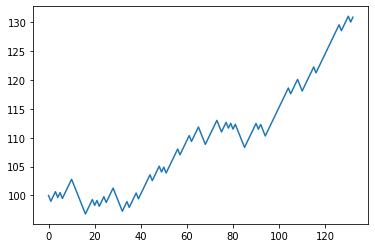

In [6]:
plt.plot(unitsOvertime)